In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [492]:
df = pd.read_csv('../data/USA Housing Dataset.csv')

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [494]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
5,2014-05-10 00:00:00,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Cedar to Green River Trail,Maple Valley,WA 98038,USA
6,2014-05-10 00:00:00,875000.0,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,6521 Fremont Ave N,Seattle,WA 98103,USA
7,2014-05-10 00:00:00,265000.0,4.0,1.00,1940,9533,1.0,0,0,3,1080,860,1962,2003,9908 S 210th Pl,Kent,WA 98031,USA
8,2014-05-10 00:00:00,394950.0,3.0,2.50,1350,1250,3.0,0,0,3,1270,80,2006,0,5940 California Ave SW,Seattle,WA 98136,USA
9,2014-05-11 00:00:00,842500.0,4.0,2.50,2160,5298,2.5,0,0,4,2160,0,1902,0,906 17th Ave,Seattle,WA 98122,USA


In [495]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
price,4140.0,553062.877289,583686.452245,0.0,320000.00,460000.00,659125.0,26590000.00
bedrooms,4140.0,3.400483,0.903939,0.0,3.00,3.00,4.0,8.00
bathrooms,4140.0,2.163043,0.784733,0.0,1.75,2.25,2.5,6.75
sqft_living,4140.0,2143.638889,957.481621,370.0,1470.00,1980.00,2620.0,10040.00
sqft_lot,4140.0,14697.638164,35876.838123,638.0,5000.00,7676.00,11000.0,1074218.00
floors,4140.0,1.514130,0.534941,1.0,1.00,1.50,2.0,3.50
waterfront,4140.0,0.007488,0.086219,0.0,0.00,0.00,0.0,1.00
view,4140.0,0.246618,0.790619,0.0,0.00,0.00,0.0,4.00
condition,4140.0,3.452415,0.678533,1.0,3.00,3.00,4.0,5.00
sqft_above,4140.0,1831.351449,861.382947,370.0,1190.00,1600.00,2310.0,8020.00


In [496]:
all_vars = df.columns
output_var_name = "price"
# features = all_vars.drop(output_var_name).to_list()
features = all_vars.drop([output_var_name,'country', 'statezip','street', 'yr_renovated', 'city', 'waterfront', 'sqft_lot', 'date'])

In [497]:
# Ensure it's datetime
df['date'] = pd.to_datetime(df['date'])

# Extract only the year
df['date'] = df['date'].dt.year

In [498]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
5,2014,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Cedar to Green River Trail,Maple Valley,WA 98038,USA
6,2014,875000.0,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,6521 Fremont Ave N,Seattle,WA 98103,USA
7,2014,265000.0,4.0,1.00,1940,9533,1.0,0,0,3,1080,860,1962,2003,9908 S 210th Pl,Kent,WA 98031,USA
8,2014,394950.0,3.0,2.50,1350,1250,3.0,0,0,3,1270,80,2006,0,5940 California Ave SW,Seattle,WA 98136,USA
9,2014,842500.0,4.0,2.50,2160,5298,2.5,0,0,4,2160,0,1902,0,906 17th Ave,Seattle,WA 98122,USA


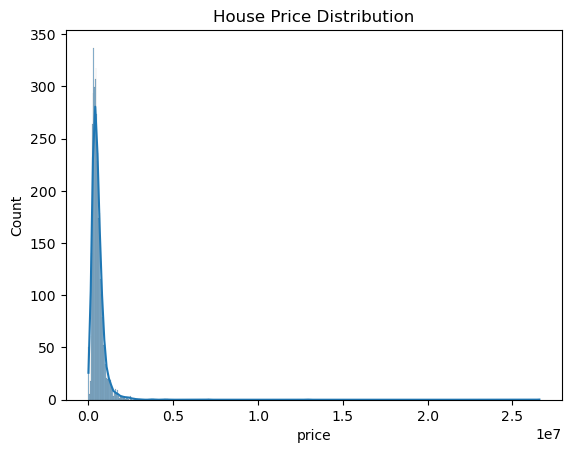

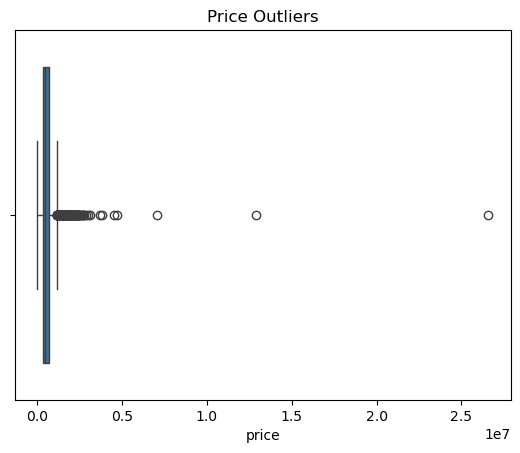

In [499]:
sns.histplot(df['price'], kde=True)
plt.title("House Price Distribution")
plt.show()

sns.boxplot(x=df['price'])
plt.title("Price Outliers")
plt.show()

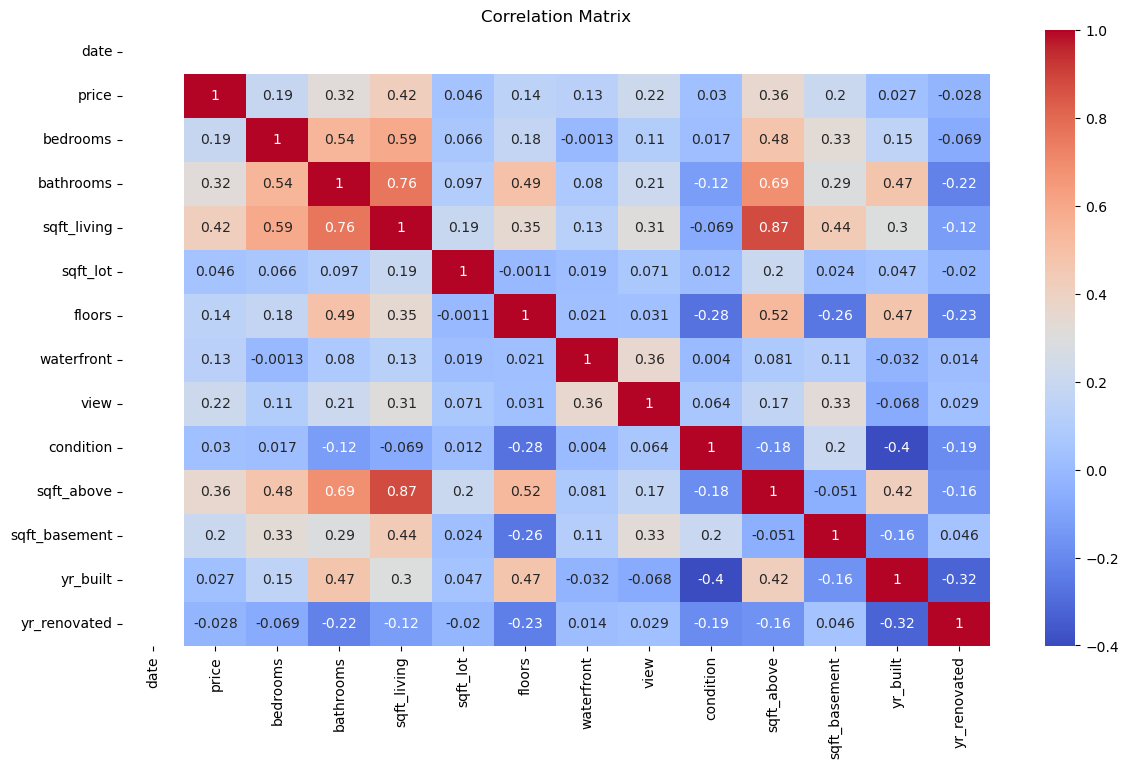

In [500]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

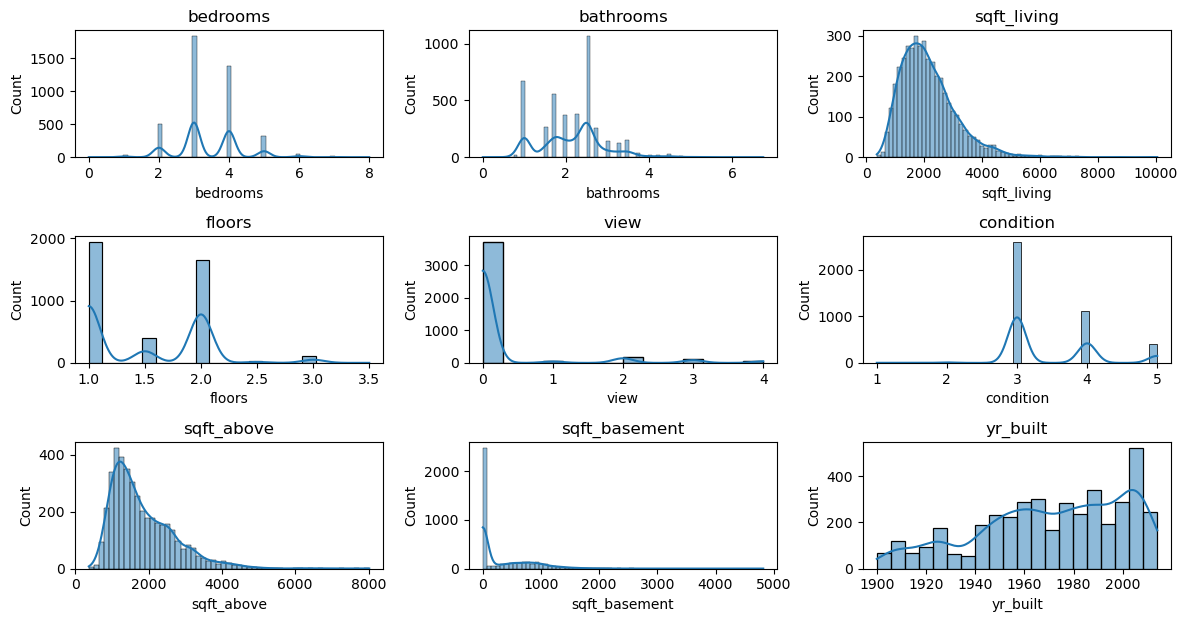

In [501]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(5, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

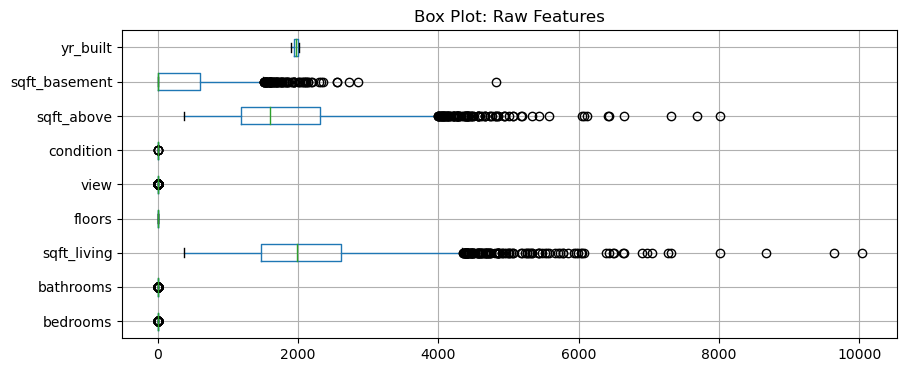

In [502]:
fig, ax = plt.subplots(figsize =(10,4))
boxplot =df[features].boxplot(vert = 0, ax=ax)
_ = ax.set_title(f'Box Plot: Raw Features')

<Axes: xlabel='sqft_living', ylabel='price'>

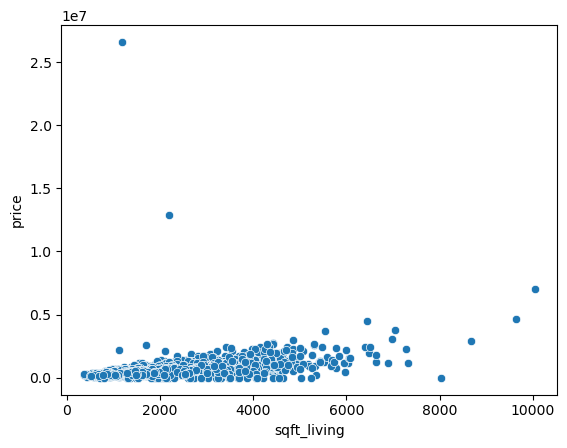

In [503]:
sns.scatterplot(x='sqft_living', y='price', data=df)


<Axes: xlabel='bedrooms', ylabel='price'>

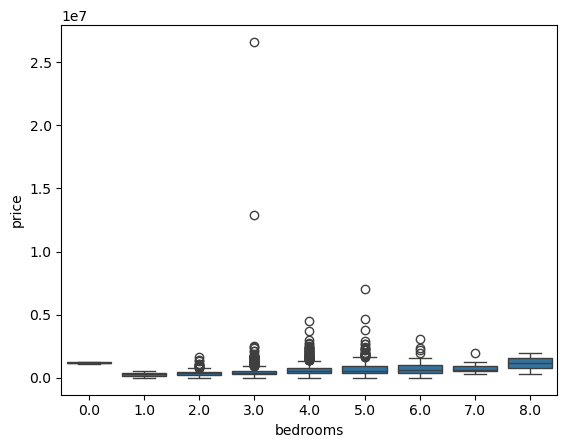

In [504]:
sns.boxplot(x='bedrooms', y='price', data=df)

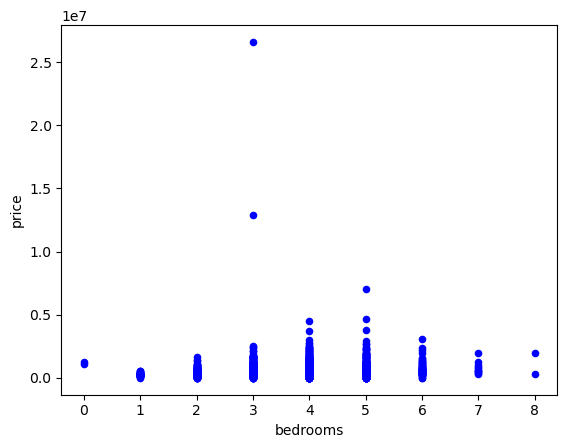

In [505]:
ax = df.plot.scatter(x='bedrooms', y='price', c='blue')

In [506]:
df = df.drop(columns=['country', 'statezip','street', 'yr_renovated', 'city', 'waterfront', 'sqft_lot', 'date' ])

In [507]:
df = df.dropna(subset=['price'])  # Drop rows with no price
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['view'].fillna(df['view'].mode()[0], inplace=True)

In [508]:
df['sqft_living'] /= 1000
df['sqft_above'] /= 1000
df['sqft_basement'] /= 1000
df['yr_built'] /= 1000
df['price'] /= 1000000

In [509]:
scaler = StandardScaler()
num_cols = ['sqft_living', 'bathrooms', 'bedrooms']
df[num_cols] = scaler.fit_transform(df[num_cols])

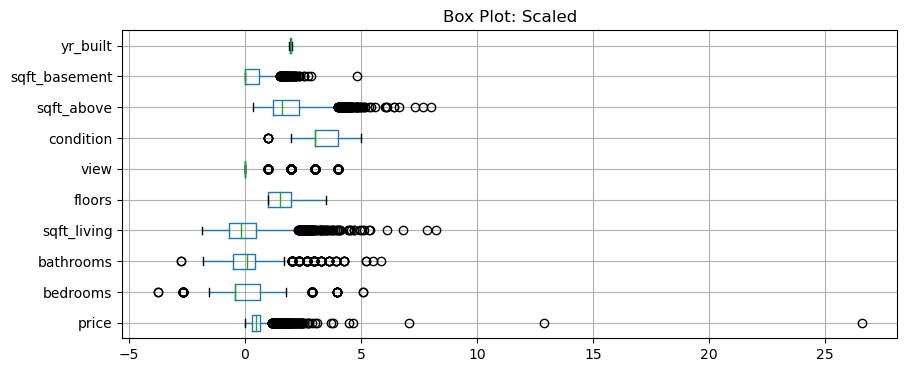

In [510]:
fig, ax = plt.subplots(figsize =(10,4))
boxplot =df.boxplot(vert = 0, ax=ax)
_ = ax.set_title(f'Box Plot: Scaled')
